<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_AAPL_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-13 12:10:47--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.101.138, 142.250.101.100, 142.250.101.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/shvvt0nb9hssvdvefffrqag9vlpbis7v/1673611800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a400dc23-e149-4a5d-9d08-b043da0c5356 [following]
--2023-01-13 12:10:48--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/shvvt0nb9hssvdvefffrqag9vlpbis7v/1673611800000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a400dc23-e149-4a5d-9d08-b043da0c5356
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/aapl_2008_Q4_20081021發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
1,Inc.,0.0,0.0,proper noun,root,False,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
10274,have,0.0,0.0,verb,conjunct,True,True,False,False
10275,a,0.0,0.0,determiner,determiner,True,True,False,False
10276,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False
10277,day,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10279 entries, 0 to 10278
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          10279 non-null  object 
 1   Polarity      10279 non-null  float64
 2   Subjectivity  10279 non-null  float64
 3   Pos_          10279 non-null  object 
 4   Dep_          10273 non-null  object 
 5   Alpha         10279 non-null  bool   
 6   Stopword      10279 non-null  bool   
 7   Punct         10279 non-null  bool   
 8   Num           10279 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 441.8+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
5,AAPL,0.0,0.0,proper noun,appositional modifier,True,False,False,False
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
10,October,0.0,0.0,proper noun,noun phrase as adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10265,presentation,0.0,0.0,noun,direct object,True,False,False,False
10268,thank,0.0,0.0,verb,root,True,False,False,False
10272,participation,0.0,0.0,noun,object of preposition,True,False,False,False
10276,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
15,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
16,ETExecutivesNancy,0.0,0.0,noun,appositional modifier,True,False,False,False
91,day,0.0,0.0,noun,root,True,False,False,False
93,welcome,0.8,0.9,noun,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10265,presentation,0.0,0.0,noun,direct object,True,False,False,False
10268,thank,0.0,0.0,verb,root,True,False,False,False
10272,participation,0.0,0.0,noun,object of preposition,True,False,False,False
10276,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
91,day,0.0,0.0,noun,root,True,False,False,False
101,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False
112,recorded,0.0,0.0,verb,root,True,False,False,False
125,like,0.0,0.0,verb,root,True,False,False,False
145,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10262,conclude,0.0,0.0,verb,root,True,False,False,False
10265,presentation,0.0,0.0,noun,direct object,True,False,False,False
10268,thank,0.0,0.0,verb,root,True,False,False,False
10276,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
101,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False
145,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
151,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
178,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
180,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
10193,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False
10205,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
10219,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False
10229,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    786.000000
mean       0.118876
std        0.257607
min       -0.700000
25%        0.000000
50%        0.000000
75%        0.214286
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    786.000000
mean       0.324627
std        0.353484
min        0.000000
25%        0.000000
50%        0.250000
75%        0.541667
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
101,fiscal,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
145,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
151,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
178,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
180,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
10193,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
10205,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10219,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
10229,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,57
1,Neutral,Objective,354
2,Neutral,Subjective,82
3,Positive,Subjective,293


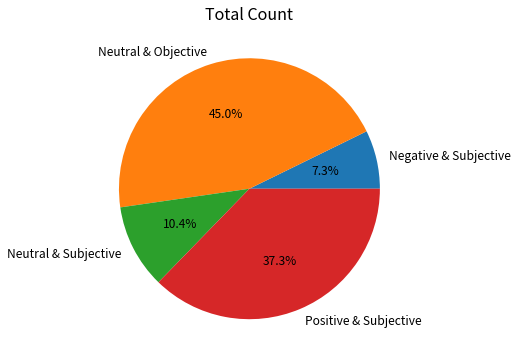

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

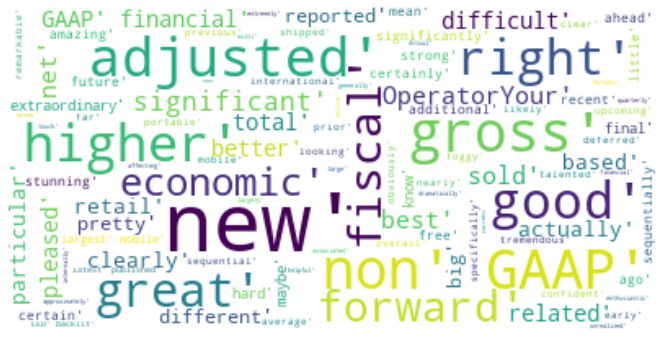

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Apple Inc. (NASDAQ:AAPL),0.0,0.00
1,"F4Q08 Earnings Call October 21, 2008 5:00 PM E...",0.0,0.00
2,Fearnley - FTN MidwestMike Abramsky - RBC Capi...,0.4,0.45
3,Today’s call is being recorded.,0.0,0.00
4,At this time for opening remarks and introduct...,0.0,0.00
...,...,...,...
390,Members of the press with additional questions...,0.0,0.00
391,Joan is at 408-974-4570 and I am at 408-974-5420.,0.0,0.00
392,Thanks again for joining us.,0.2,0.20
393,"OperatorLadies and gentlemen, that does conclu...",0.0,0.00


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    395.000000
mean       0.148839
std        0.228185
min       -0.650000
25%        0.000000
50%        0.083333
75%        0.250000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    395.000000
mean       0.341369
std        0.286957
min        0.000000
25%        0.000000
50%        0.363889
75%        0.515278
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Apple Inc. (NASDAQ:AAPL),0.0,0.00,Neutral,Objective
1,"F4Q08 Earnings Call October 21, 2008 5:00 PM E...",0.0,0.00,Neutral,Objective
2,Fearnley - FTN MidwestMike Abramsky - RBC Capi...,0.4,0.45,Positive,Subjective
3,Today’s call is being recorded.,0.0,0.00,Neutral,Objective
4,At this time for opening remarks and introduct...,0.0,0.00,Neutral,Objective
...,...,...,...,...,...
390,Members of the press with additional questions...,0.0,0.00,Neutral,Objective
391,Joan is at 408-974-4570 and I am at 408-974-5420.,0.0,0.00,Neutral,Objective
392,Thanks again for joining us.,0.2,0.20,Positive,Subjective
393,"OperatorLadies and gentlemen, that does conclu...",0.0,0.00,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,42
1,Neutral,Objective,109
2,Neutral,Subjective,22
3,Positive,Subjective,222


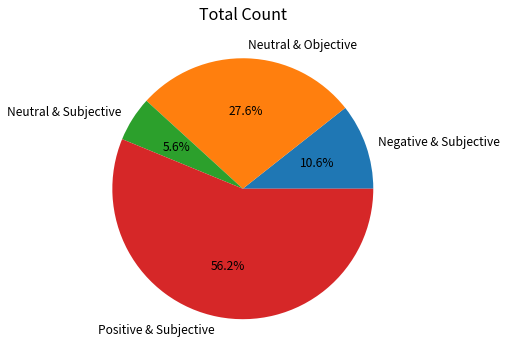

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Please note that some of the information you will hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue, gross margin, operating expenses, other income and expense, stock-based compensation expense, taxes, and earnings per share.

2)Revenue for the quarter was $7.9 billion, representing 27% growth and an increase of $1.68 billion over the previous September quarter’s revenue of $6.22 billion.

3)We calculated adjusted sales by backing out the September quarter’s amortization of deferred revenue from iPhone and Apple TV sales and adding back all amounts generally due at the time of sale for iPhones and Apple TVs shipped in the September quarter.

4)Over half the Macs sold through the retail stores during the quarter were to customers who have never owned a Mac before.

5)With an average of 226 stores open during the quarter, average revenue per store was $7.6 million, compared to $6.6 million in the year-ago qu

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Apple Inc. (NASDAQ:AAPL)

2)F4Q08 Earnings Call October 21, 2008 5:00 PM ETExecutivesNancy Paxton - Senior Director, Investor Relations and Corporate FinancePeter Oppenheimer - Chief Financial Officer, Senior Vice PresidentSteven P. Jobs - Chief Executive Officer, DirectorTimothy D. Cook - Chief Operating OfficerGary Wipfler - TreasurerAnalystsBill Shope - Credit SuisseRichard Gardner - CitigroupBen Reitzes - Barclays Capital Shannon Cross - Cross ResearchGene Munster - Piper JaffrayCharles Wolf - Needham & CompanyToni Sacconaghi - Sanford BernsteinBill

3)Today’s call is being recorded.

4)At this time for opening remarks and introductions, I would like to turn the call over to Nancy Paxton, Senior Director Investor Relations and Corporate Finance.

5)Please go ahead.

6)Nancy PaxtonThank you.

7)And with that, I would like to turn the call over to Apple's CFO, Peter Oppenheimer, for introductory remarks.

8)Peter OppenheimerThank you, Nancy.

9)Thank you for joining us.

10)Net inc

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)Actual results or trends could differ materially from our forecasts.

2)Apple assumes no obligation to update any forward-looking statements or information which speak as of their respective dates.

3)This results in the deferral of almost all revenue and cost of sales related to iPhone and Apple TV during the quarter in which these products are sold to customers.

4)We calculated adjusted cost of sales by backing out the September quarter’s amortization of deferred costs related to iPhone and Apple TV and adding back the total cost of the iPhones and Apple TVs shipped in the September quarter.

5)We also used an estimate of the total future warranty expense related to the iPhones and Apple TVs sold in the September quarter rather than reflecting the actual iPhone and Apple TV warranty expenses incurred during the September quarter.

6)Third, we used the non-GAAP measure of adjusted net income to evaluate our performance based on the current period iPhone and Apple TV sales and to fa

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Fearnley - FTN MidwestMike Abramsky - RBC Capital MarketsOperatorGood day and welcome to this Apple Incorporated Apple fourth quarter fiscal year 2008 conference call.

2)Good afternoon and thanks to everyone for joining us.

3)For more information, please refer to the risk factors discussed in Apple's Form 10-K for 2007, the Form 10-Q for the first three quarters of fiscal 2008, and the Form 8-K filed with the SEC today and the attached press release.

4)We are very pleased to report the our September quarter results, which were record-breaking on a number of fronts.

5)First, we sold more Macs than we have in any other quarter in Apple's history.

6)Second, we sold more iPhones in the September quarter than in all previous quarters combined.

7)Third, we sold more iPods than in any prior non-holiday quarter and finally, we generated more revenue and earnings than in any previous September quarter in Apple's history.

8)Operating margin for the quarter was better than expected at 18

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

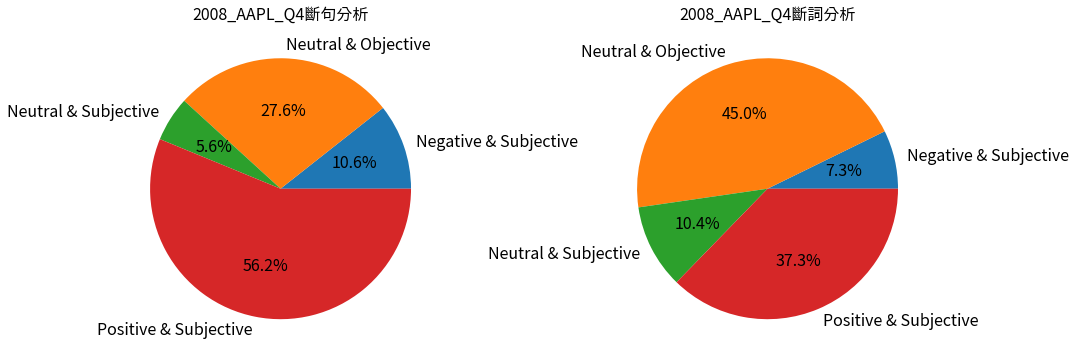

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]



axs[1].pie(size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[1].set_title('2008_AAPL_Q4斷詞分析', fontsize=16)


axs[0].pie(_size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[0].set_title('2008_AAPL_Q4斷句分析', fontsize=16)


plt.savefig("2008_AAPL_Q4.png")
from google.colab import files
files.download("2008_AAPL_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 1058246 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
